# Multiple Linear Regression using Python
In this notebook we will solve a Multiple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

Suppose we want to determine the price per unit area of a house in a dataset of historical purchases made in an area in which we have multiple features such as __*transaction_number, transaction_date, house_age, distance_to_nearest_bus_station, number_of_convenience_stores, latitude, and longitude.*__


The objective of this task is to train a ML regression model that can accurately predict the price per unit area of a given house.

![alt text](img/real_estate.jpg "Real Estate")

### Step 1: Importing Libraries for our task

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [26]:
df = pd.read_csv('dataset/03-real_estate_dataset.csv')

### 3. Exploring the data 
Let us explore the data 

In [27]:
df.shape

(414, 8)

In [28]:
df.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
df.describe()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After exploring our data, we can use our intuition, to drop some of the features that might have no contribution to our model

In [6]:
df = df.drop('number', axis=1)
df = df.drop('transaction_date', axis=1)
df.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### 4. Splitting the data into training and test sets

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [8]:
X.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -1194.2145132626354
w = [-2.65600030e-01 -4.74964456e-03  1.13434674e+00  2.28565503e+02
 -3.67741638e+01]


### 7. Evaluating our model performance

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 66.75
Coefficient of determination: 0.58


We can use our model to make different kinds of predictions as follows

In [14]:
data = {
'house_age':[32.0],
'distance_to_nearest_bus_station': [84.87882],
'number_of_convenience_stores':[10],
'latitude':[24.98298],
'longitude':[121.54024],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[48.93331686]


## Task 2
The aim of this task is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using Simple Linear Regression and Multiple Linear Regression. The dataset contains the following features ***TV, Radio, Newspaper*** and the target column is ***Sales*** 

Hint: _For Simple Linear Regression, select the feature with the highest correlation with the target column._

Compare the Mean Squared error and Coefficient of determination for both models

For Simple linear regression

1. Installing the libraries required

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

2. Accessing the dataframe as the datasets to be used

In [2]:
import pandas as pd
df =pd.read_csv('dataset/01-sales_dataset.csv') 

3. Exploring and analysing of the data using .shape, .head(), .describe()

In [3]:
df.shape

(5, 2)

In [4]:
df.head()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


In [5]:
df.tail()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


In [6]:
df.describe()

,year,sales
count,5.000000,5.000000
mean,2007.000000,28.400000
std,1.581139,13.296616
min,2005.000000,12.000000
25%,2006.000000,19.000000
50%,2007.000000,29.000000
75%,2008.000000,37.000000
max,2009.000000,45.000000


Finding if there is any correlation between sales and years using pandas dataframe plot method

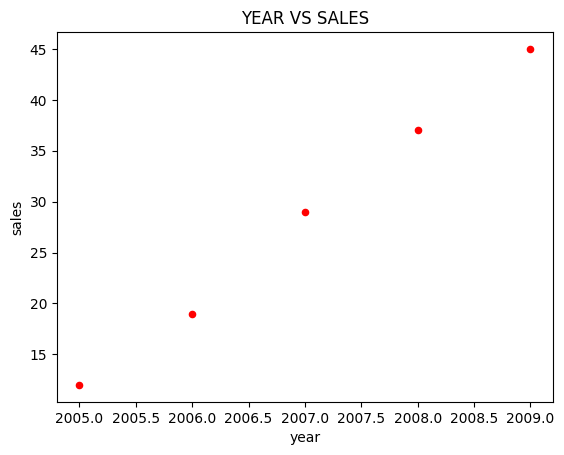

<Figure size 2400x1800 with 0 Axes>

In [7]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np 
df = pd.read_csv('dataset/01-sales_dataset.csv')

df.plot(x='year', y='sales', kind='scatter',color='red')
plt.title('YEAR VS SALES')
plt.xlabel('year')
plt.ylabel('sales')
fig=plt.figure(figsize=(8,6), dpi=300)
plt.show()



4. Splitting of the datasets so as to train and test it.The X variable is specified -1 so as it takes only column for year and y variable is specified so as it takes only column for sales.

In [8]:
import pandas as pd 

df = pd.read_csv('dataset/01-sales_dataset.csv')
X = df.iloc[:, :-1].values 
y = df.iloc[:, :1].values 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

5. Creating the model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Import train_test_split
# Assuming you have a dataset X_train, y_train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Using the model to make predictions for dataset test.
 The formulated equation below represents our model as it has the parameters; $w$ and $b$ :
$f_{w,b}(x) = wx + b$

In [11]:
y_pred=model.predict(X_test)

In [12]:
print(f'b ={model.intercept_}')
print(f'w ={model.coef_}')

b =[0.]
w =[[1.]]


Therefore the equation of the model is
          f(x)=1.0x-0.0.then we plot it on the scatter plot so as to visualize how the datasets fits.Note that its the first procedure of evaluating our model.

C:\Users\EJ\AppData\Local\Temp\ipykernel_8772\1632710794.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(min(X), max(X)+1, 1.0))


Text(0, 0.5, 'sales')

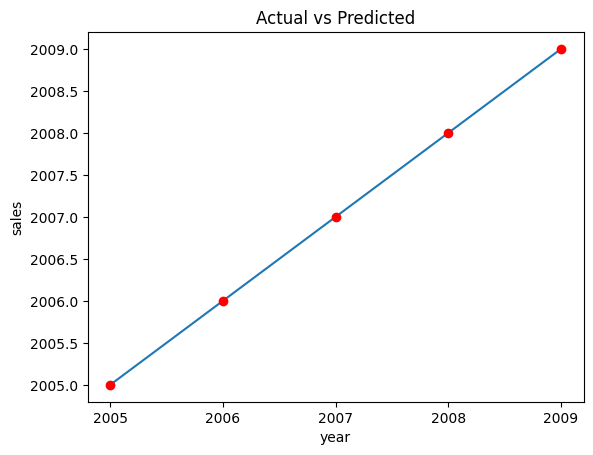

In [13]:
from matplotlib import pyplot as plt
import numpy as np

all_y_pred = model.predict(X)
plt.plot(X, all_y_pred) # Regression line
plt.plot(X, y, 'ro') # Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.xlabel('year')
plt.ylabel('sales')

7. Evaluating the model performance by displaying some metrics.
This include
 
=>Mean Squarred Error(MSE)
It measures the amount of error in statistical models. Including assessesing the average squared difference between the observed and predicted values.
NB:When a model has no error, the MSE equals zero, as model error increases, its value increases. 

=>Coefficient of determination($(R^2)$)
it measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.The lowest possible value of $(R^2)$ is 0 and the highest possible value is 1. 
NB:The better a model is one making predictions,that its $(R^2)$ will be closer to 1.

In [14]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean_squared_error:%.2f" %mean_squared_error(y_test,y_pred))
print("Coefficient of determination:%.2f" %r2_score(y_test,y_pred))

Mean_squared_error:0.00
Coefficient of determination:1.00


For multiple_linear_regression

1. Installing the required libraries

In [37]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

2. Accessing the dataframe as the datasets to be used.

In [38]:
import pandas as pd
df = pd.read_csv('dataset/01-sales_dataset.csv')

3. Exploring and analysing of the data

In [39]:
df.shape

(5, 2)

In [40]:
df.head()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


In [41]:
df.tail()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


In [42]:
df.describe()

,year,sales
count,5.000000,5.000000
mean,2007.000000,28.400000
std,1.581139,13.296616
min,2005.000000,12.000000
25%,2006.000000,19.000000
50%,2007.000000,29.000000
75%,2008.000000,37.000000
max,2009.000000,45.000000


4. Splitting the data into traning and test datasets

In [43]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [44]:
X.head()

,year
0,2005
1,2006
2,2007
3,2008
4,2009


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

5. Building the model so as to fit training dataset

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

6. Using the model to make predictions for other datasets

In [48]:
y_pred = model.predict(X_test)

In [49]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -16743.999999999996
w = [8.35714286]


7. Evaluating the model performance

In [50]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1.15
Coefficient of determination: 0.99


8. Comparison of both models

Mean_squared error;
simple linear regression had a MSE equals zero meaning model has no error.
multiple linear regression had MSE equals 1.15 meaning the model has errors.

Coefficient of determination;
Both simple and multiple regression are better models in making predictions since both coefficient of determination are closer to 1.

## Task 3:

To develop the best medical insurance products, the insurer needs access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome. For all these cases, the objective is to accurately predict insurance costs.

![alt text](img/health_insurance.jpg "Health Insurance")


#### Dataset
You are provided with a dataset in the **dataset/04-insurance_charges.csv** file that contains medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.
The following is the description of the features contained in the dataset: 
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

#### Use Case
The objective is to train a ML regression model that can accurately predict the insurance costs for a given individual



1. Installing the required libraries 

In [19]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

2. Accessing the dataframe as the datasets to be used

In [20]:
import pandas as pd
df = pd.read_csv('dataset/05-insurance_charges.csv')

3. Exploring and  analysing of the data 

In [21]:
df.shape

(1338, 7)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [24]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


4. Splitting the data into training and test datasets

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [31]:
X.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

5. Building the model so as to fit training dataset

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

6. Using the model to make predictions for other dataset

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -11873.189919882154
w = [-6.32243008e-03  5.85984113e+00 -2.64500961e-01 -5.05161951e-03
  1.11897077e+00  2.16450067e+02 -4.34687808e+01]


7. Evaluating the model perfomance

In [36]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 68.07
Coefficient of determination: 0.57
